<a href="https://colab.research.google.com/github/newnativeabq/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import snippets 
from snippets.files import DownloadFile
import wget

In [2]:
# Url
black_friday_csv_link = "https://raw.githubusercontent.com/pierretd/datasets-1/master/BlackFriday.csv"
# Reading in csv
DownloadFile(black_friday_csv_link, name='blackfriday')

File already exists


'BlackFriday.csv'

In [3]:
raw_d = pd.read_csv('blackfriday.csv')

In [4]:
print(raw_d.head())
print(len(raw_d))

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

### The above dataset has already been loaded in for you, answer the following questions. If you get done quickly, move onto stretch goals and super stretch goals. Work on improving your model until 8:40.

#### 1) Clean the data set and drop the Null/NaN values. Rename  Product_Category_1-3 columns with an actual Product.

In [21]:
clean_d = raw_d.dropna(how='any')
print(len(clean_d))

164278


In [22]:
print(clean_d['Product_Category_1'].value_counts())
print(clean_d['Product_Category_2'].value_counts())
print(clean_d['Product_Category_3'].value_counts().values)

1     89822
5     18697
2     16045
3     12242
8      8937
6      8280
4      5257
11     1937
10     1720
13     1035
12      157
15      149
Name: Product_Category_1, dtype: int64
2.0     42893
8.0     26530
4.0     19213
5.0     15616
15.0    14285
6.0     11979
14.0    11806
13.0     6028
11.0     5706
9.0      2934
3.0      2835
10.0     2224
12.0     1359
16.0      870
Name: Product_Category_2, dtype: int64
[32148 27611 18121 16449 16380 12384 11414  9094  5385  4818  4563  1840
  1773  1698   600]


In [23]:
## Reasonable amount of things.  Let's see if faker can give us something to use.  We can also make the dtype a category.
from faker import Faker

In [24]:
# We'll make three attributes for product categories 1-3
# Company
# Color
# Name (artist, why not)

# Create a faker instance.  Add providers we need (company and color)
from faker.providers import color, company
fake = Faker()

# Create a list of items for each unique value in category
new_types = ['Company', 'Color', 'Designer']
columns = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']

# Create a column_name dictionary to rename columns
column_names = {}
for counter, col in enumerate(columns):
    column_names[col] = new_types[counter]

# Change column names
clean_d = clean_d.rename(columns=column_names)    

In [25]:
# Label the data in three steps.  Step 1: create a category map.  Step 2: cast series as category.  Step 3: Apply map to series.
# Making a list of maps
label_dicts = []
for col in new_types:
    temp_dict = {}
    
    for item in clean_d[col].value_counts().values:
        if col == 'Company':
            temp_dict[item] = fake.company()
        if col == 'Color':
            temp_dict[item] = fake.color_name()
        if col == 'Designer':
            temp_dict[item] = fake.name()
    
    label_dicts.append(temp_dict)

# Cast series as category
for col in new_types:
    clean_d[col] = clean_d[col].astype('category')

# Ok. Finally, let's map the label_dicts to that data
for index, col in enumerate(new_types):
    clean_d[col] = clean_d[col].cat.rename_categories(label_dicts[index])

clean_d.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Company,Color,Designer,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055


#### 2) How many unique user_ids does the data set contain?

In [26]:
print('data len:', clean_d['User_ID'].count())
print('total unique values:', clean_d['User_ID'].value_counts().count())

data len: 164278
total unique values: 5868


#### 3) How many unique age brackets are in the dataset. Which Age bracket has the most entries? Which has the least?

In [27]:
print('data len:', clean_d['Age'].count())
print('total unique values:', clean_d['Age'].value_counts().count())
print(clean_d['Age'].value_counts()[:1])
print(clean_d['Age'].value_counts()[6:7])

data len: 164278
total unique values: 7
26-35    65916
Name: Age, dtype: int64
0-17    4789
Name: Age, dtype: int64


#### 4) Transform the Gender categorical variable into a numerical variable. Then transform that numerical value into a Boolean.

In [28]:
clean_d['Gender'] = clean_d.Gender.astype('category').cat.codes.astype('bool')
clean_d.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Company,Color,Designer,Purchase
1,1000001,P00248942,False,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,True,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,True,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,False,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,False,51-55,9,A,1,0,2,3.0,4.0,13055


#### 5) What is the average Occupation score? What is the Standard Deviation? What is the maximum and minimum value?

In [29]:
print('mean:', clean_d.Occupation.mean())
print('std:', clean_d.Occupation.std())
print('max/min:', clean_d.Occupation.max(), '/', clean_d.Occupation.min())

mean: 8.180383252778826
std: 6.486705108506024
max/min: 20 / 0


#### 6) Group Age by Gender and print out a cross tab with age as the y axis

In [30]:
table = clean_d[['Age', 'Gender']].copy()
table['Count'] = 1
table = table.groupby(['Age', 'Gender']).sum()
table

Count
Age   Gender       
0-17  False    1552
      True     3237
18-25 False    6970
      True    23919
26-35 False   13364
      True    52552
36-45 False    7728
      True    25030
46-50 False    3572
      True     9563
51-55 False    2479
      True     8539
55+   False    1267
      True     4506

In [31]:
pd.crosstab(clean_d['Age'], clean_d['Gender'])

Gender,False,True
Age,,
0-17,1552,3237
18-25,6970,23919
26-35,13364,52552
36-45,7728,25030
46-50,3572,9563
51-55,2479,8539
55+,1267,4506


In [32]:
table.unstack()

Count       
Gender  False  True 
Age                 
0-17     1552   3237
18-25    6970  23919
26-35   13364  52552
36-45    7728  25030
46-50    3572   9563
51-55    2479   8539
55+      1267   4506

### Stretch Goal:

#### Build a linear regression model to predict the purchase amount given the other features in the data set with scikit learn.

In [33]:
# Import key libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
## Prep dataset for learning by converting non-numeric into categories (numeric with label?)
cat_list = []
for index, col in enumerate(clean_d.columns):
    if clean_d[col].dtype == 'object' and col != 'Age':
        clean_d[col] = clean_d[col].astype('category').cat.codes

## Age needs to be ordinal.  Not sure what Occupation means...
## I decided to map them to the largest value in each bucket to give the model some spacing information
age_map = {'0-17': 17,
           '18-25': 25,
           '26-35': 35,
           '36-45': 45,
           '46-50': 50,
           '51-55': 55,
           '55+': 80,
          }
clean_d['Age'] = clean_d['Age'].map(age_map)
print(clean_d.dtypes)
clean_d.head()

User_ID                          int64
Product_ID                       int16
Gender                            bool
Age                              int64
Occupation                       int64
City_Category                     int8
Stay_In_Current_City_Years        int8
Marital_Status                   int64
Company                       category
Color                         category
Designer                      category
Purchase                         int64
dtype: object


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Company,Color,Designer,Purchase
1,1000001,392,False,17,10,0,2,0,1,6.0,14.0,15200
6,1000004,285,True,50,7,1,2,1,1,8.0,17.0,19215
13,1000005,212,True,35,20,0,1,1,1,2.0,5.0,15665
14,1000006,364,False,55,9,0,1,0,5,8.0,14.0,5378
16,1000006,518,False,55,9,0,1,0,2,3.0,4.0,13055


In [35]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(clean_d, test_size=0.2)

# Subset data to features and training
feat_train = train.drop(columns=['Purchase'])
feat_test = test.drop(columns=['Purchase'])

target_train = train['Purchase']
target_test = test['Purchase']

In [43]:
# Create model object, fit to training data and test it

model = linear_model.LinearRegression()

## List of features and targets (x an y) to look at
features = ['Age', 'Stay_In_Current_City_Years']

X_train = feat_train[features]
X_test = feat_test[features]
Y_train = target_train
Y_test = target_test

## Fit model
model.fit(X_train, Y_train)

# Test model
Y_pred = model.predict(X_test)

print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))

Mean squared error: 25862559.87


### Super Stretch Goals: 

#### Plot the actual values vs the predicted values.

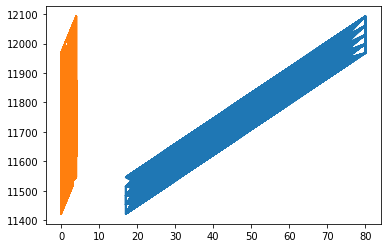

In [44]:
plt.plot(X_test, Y_pred)
#plt.plot(X_test, Y_test)
plt.show()


#### Find a good way to measure your model's predictive power.


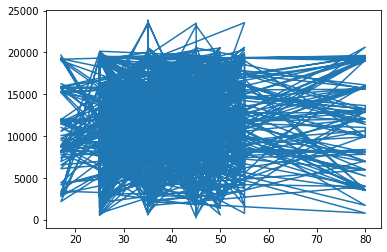

In [50]:
# The regression is strong, but it's predictive power (in terms of error) is awful.
sample = clean_d.sample(frac=0.01)
plt.plot(sample['Age'], sample['Purchase'])

<BarContainer object of 1643 artists>

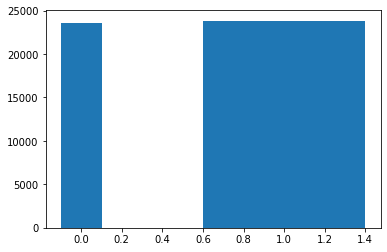

In [51]:
plt.bar(sample['Gender'], sample['Purchase'])